In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temyimage/temy.png
/kaggle/input/english-handwritten-characters-dataset/english.csv
/kaggle/input/english-handwritten-characters-dataset/Img/img040-022.png
/kaggle/input/english-handwritten-characters-dataset/Img/img051-027.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-049.png
/kaggle/input/english-handwritten-characters-dataset/Img/img011-047.png
/kaggle/input/english-handwritten-characters-dataset/Img/img038-026.png
/kaggle/input/english-handwritten-characters-dataset/Img/img021-042.png
/kaggle/input/english-handwritten-characters-dataset/Img/img057-036.png
/kaggle/input/english-handwritten-characters-dataset/Img/img049-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img023-054.png
/kaggle/input/english-handwritten-characters-dataset/Img/img019-004.png
/kaggle/input/english-handwritten-characters-dataset/Img/img017-016.png
/kaggle/input/english-handwritten-char

In [2]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2024-08-14 14:03:27.272141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 14:03:27.272271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 14:03:27.440728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Path to the dataset
data_path = '/kaggle/input/english-handwritten-characters-dataset/Img'

In [4]:
# Function to load images and labels
def load_images_and_labels(data_path):
    images = []
    labels = []
    for filename in os.listdir(data_path):
        if filename.endswith('.png'):
            # Extract label from filename
            label = filename.split('-')[0].replace('img', '')
            # Load and preprocess image
            img = cv2.imread(os.path.join(data_path, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))  # Resize to a fixed size
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
# Load images and labels
images, labels = load_images_and_labels(data_path)

In [6]:
# Normalize images
images = images / 255.0

In [7]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = to_categorical(labels_encoded)

In [8]:
# Reshape images for CNN input
images = images.reshape(images.shape[0], 64, 64, 1)  # (num_samples, height, width, channels)

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [10]:
# Build the advanced CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Flattening layer
model.add(Flatten())

In [12]:
# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.0174 - loss: 4.1399 - val_accuracy: 0.0293 - val_loss: 4.1149
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.0313 - loss: 4.0469 - val_accuracy: 0.0953 - val_loss: 3.5784
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.1173 - loss: 3.4335 - val_accuracy: 0.3563 - val_loss: 2.4719
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.2857 - loss: 2.5588 - val_accuracy: 0.5073 - val_loss: 1.8220
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.4569 - loss: 1.8789 - val_accuracy: 0.6188 - val_loss: 1.3901
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.5739 - loss: 1.3992 - val_accuracy: 0.6760 - val_loss: 1.1212
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.6388 - loss: 1.1630 - val_accuracy: 0.7185 - val_loss: 0.9943
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7072 - loss: 0.9668 - val_accu

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7522 - loss: 0.9816
Test Loss: 0.8606, Test Accuracy: 0.7742


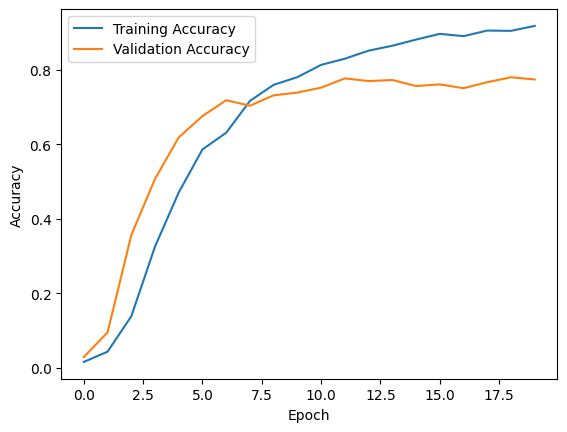

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Optionally, plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


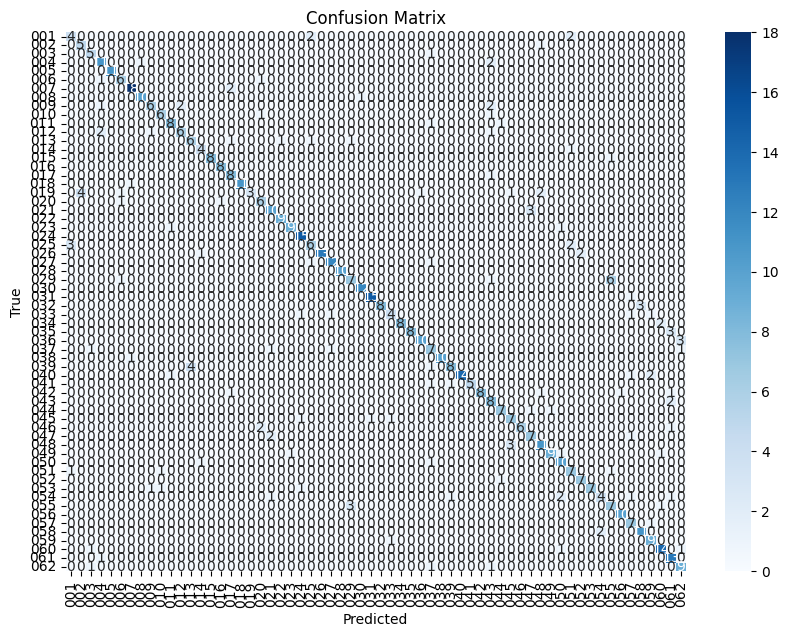

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

         001       0.50      0.50      0.50         8
         002       0.56      0.83      0.67         6
         003       0.62      0.83      0.71         6
         004       0.69      0.79      0.73        14
         005       1.00      1.00      1.00        11
         006       0.67      0.75      0.71         8
         007       0.90      0.90      0.90        20
         008       0.91      0.91      0.91        11
         009       0.75      0.55      0.63        11
         010       0.75      0.75      0.75         8
         011       0.80      0.80      0.80        10
         012       0.75      0.60      0.67        10
         013       0.60      0.60      0.60        10
         014       0.67      0.80      0.73         5
         015       1.00      0.89      0.94         9
         016       0.89      1.00      0.94         8
         017       0.67      0.89      0.76         9
         018       1.00    

In [18]:
# Save the model in .keras format (for Keras 3.x)
model.save('final_model.keras')


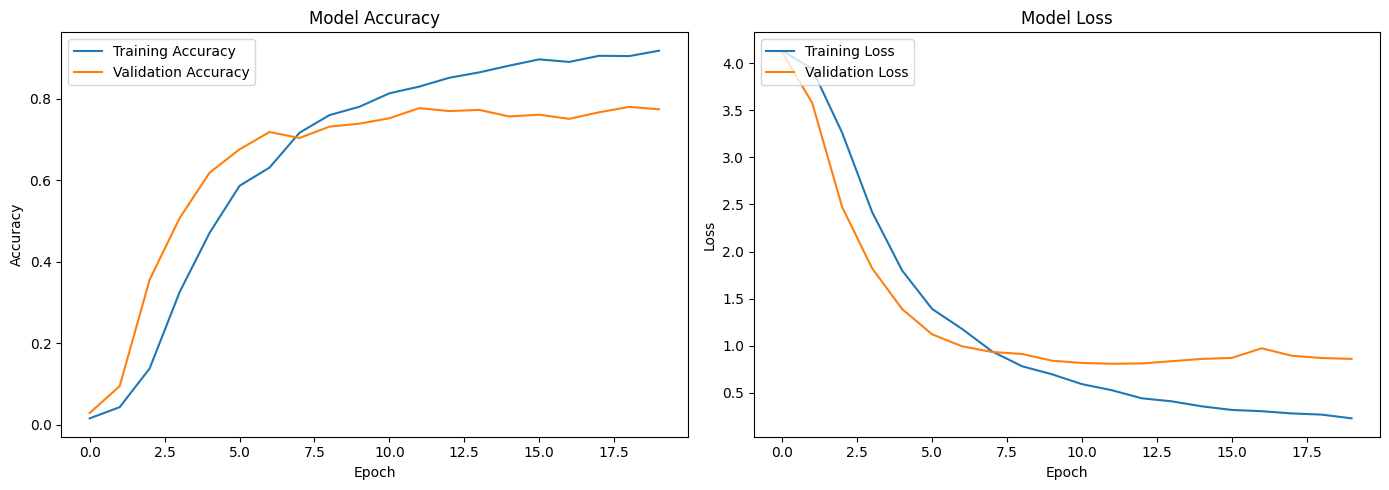

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


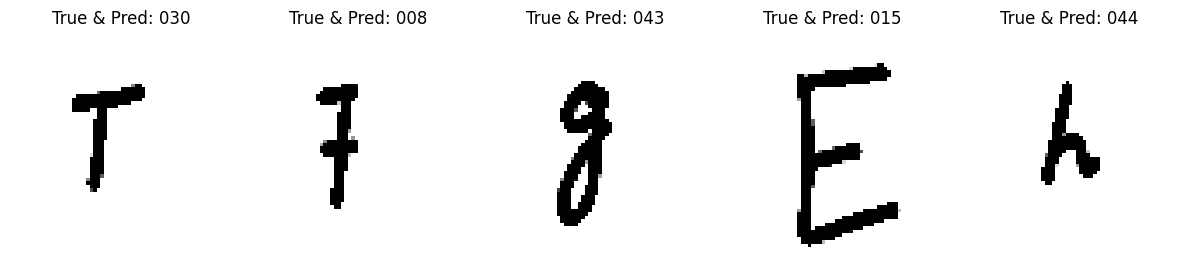

In [24]:
import numpy as np

# Get indices of correctly classified examples
correctly_classified_indices = np.where(y_true == y_pred_classes)[0]

# Plot a few correctly classified examples
plt.figure(figsize=(12, 12))
for i, idx in enumerate(random.sample(list(correctly_classified_indices), 5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    plt.title(f'True & Pred: {label_encoder.classes_[y_true[idx]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

